In [ ]:
#Import needed libraries
import numpy as np 
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import os

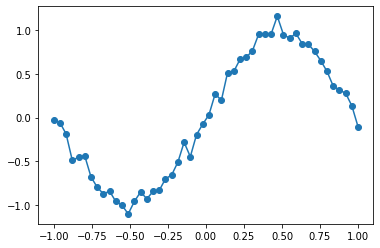

In [ ]:
#Prepare the training set 
x_train = np.linspace(start=-1, stop=1, num=50)
y_train = [np.sin(np.pi*x) for x in x_train]
y_train = [y+np.random.normal(loc=0, scale=0.075) for y in y_train]
y_train = np.array(y_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train)
plt.show()

In [ ]:
def fit_this_ANN(nHL, nn, actHL, nepochs):
  '''This function recieves a number of hidden layers nHL which must be 1, 2 or 3, the number of neurons in each hidden layer, which must be a tuple or a list with nHL integers''' 
  if type(nHL)!=type(1):
    print('Not allowed type for number of layers nHL, returning -1')
    return -1
  if nHL<1 or nHL>3:
    print('Not allowed value for number of layers nHL, returning -1')
    return -1
  if type(nn)!=type(()) and type(nn)!=type([]):
    print('Not allowed type for nn, returning -1')
    return -1
  nn = np.array(nn, dtype=int)
  if np.ndim(nn)!=1 or np.size(nn)!=nHL:
    print('Not allowed ndim or size for nn, returning -1')
    return -1
  if type(actHL)!=type(''):
    print('Not allowed type for actHL, returning -1')
    return -1
  if type(nepochs)!=type(1):
    print('Not allowed type for nepochs, returning -1')
    return -1
  if nepochs<0:
    print('Not allowed value for nepochs, returning -1')
    return -1
  
  model = Sequential()
  model.add(Dense(units=nn[0], activation=actHL, input_shape=(1,)))
  if nHL>1:
    model.add(Dense(units=nn[1], activation=actHL))
  if nHL>2:
    model.add(Dense(units=nn[2], activation=actHL))
  model.add(Dense(units=1, activation='linear'))
  model.compile(loss='MeanSquaredError')
  historia=model.fit(x_train, y_train, batch_size=50, epochs=nepochs, verbose=0)
  return historia.history['loss'], model

  
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


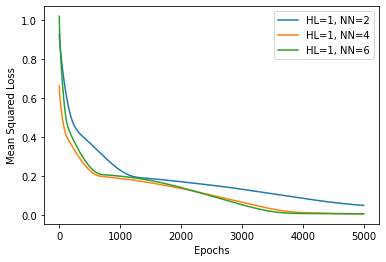

In [ ]:
Nepochs=5000
activationF='sigmoid'
loss, model_1 = fit_this_ANN(1,[2],activationF,Nepochs)
plt.plot(loss, label='HL=1, NN=2')
loss, model_2 = fit_this_ANN(1,[4],activationF,Nepochs)
plt.plot(loss, label='HL=1, NN=4')
loss, model_3 = fit_this_ANN(1,[6],activationF,Nepochs)
plt.plot(loss, label='HL=1, NN=6')
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Loss')
plt.savefig('loss.eps', format='eps')
plt.savefig('loss.png', format='png')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


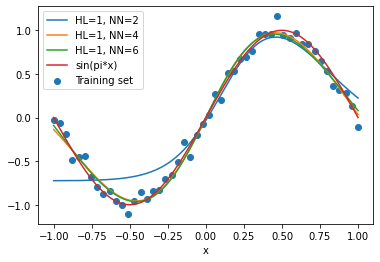

In [ ]:
x_test = np.linspace(start=-1,stop=1,num=200)
plt.plot(x_test, model_1.predict(x_test), label='HL=1, NN=2')
plt.plot(x_test, model_2.predict(x_test), label='HL=1, NN=4')
plt.plot(x_test, model_3.predict(x_test), label='HL=1, NN=6')
plt.plot(x_test, np.sin(np.pi*x_test), label='sin(pi*x)')
plt.scatter(x_train, y_train, label='Training set')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('x')
plt.savefig('prediction.eps', format='eps')
plt.savefig('prediction.png', format='png')
plt.show()


In [ ]:
print(os.path.abspath('.'))

/content
